RECURRENT NEURAL NETWORK (RNN)

1. What is an RNN?
A type of neural network designed for sequential data.
Unlike regular neural networks, it has memory of previous inputs.

2. Key Idea

RNNs use recurrent connections where output from the previous step is fed back into the network.

This helps capture patterns over time.

3. Architecture Concept

Takes input one step at a time.

Each step produces:

Hidden state → carries memory

Output → prediction

Shares the same weights across all time steps.

4. Why Use RNNs?

Good for tasks where order matters, such as:

Natural language processing

Time-series prediction

Speech recognition

Music generation

Sequential classification

5. Advantages

Can model time-dependent patterns.

Works well on variable-length sequences.

Can learn context from earlier inputs.

6. Disadvantages

Suffers from vanishing and exploding gradients.

Hard to learn long-term dependencies.

Slow training (sequential computation).

LSTMs/GRUs are usually preferred instead of basic RNN.

In [41]:
from keras.datasets import imdb
from keras.preprocessing import sequence


In [42]:
max_features = 10000
maxlen = 500
batch_size = 32

In [43]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = max_features) # Usign IMDB dataset for training and training

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [44]:
print(len(x_train),'train sequences')
print(len(x_test),'test sequences')

25000 train sequences
25000 test sequences


In [45]:
print ('pad sequences(sample x time)')

pad sequences(sample x time)


In [46]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
x_train = sequence.pad_sequences(x_train,maxlen = maxlen)
x_test = sequence.pad_sequences(x_test,maxlen = maxlen)
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)

x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [48]:
from keras.layers import Dense, Embedding, SimpleRNN
from keras.models import Sequential
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation = 'sigmoid'))


In [49]:
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [50]:
history = model.fit(x_train,y_train,epochs = 10,batch_size = 128,validation_split = 0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 161ms/step - accuracy: 0.5458 - loss: 0.6833 - val_accuracy: 0.7478 - val_loss: 0.5291
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 151ms/step - accuracy: 0.7899 - loss: 0.4633 - val_accuracy: 0.6516 - val_loss: 0.7786
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step - accuracy: 0.8468 - loss: 0.3621 - val_accuracy: 0.7870 - val_loss: 0.4465
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 154ms/step - accuracy: 0.8949 - loss: 0.2676 - val_accuracy: 0.8242 - val_loss: 0.4016
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.9290 - loss: 0.1991 - val_accuracy: 0.6456 - val_loss: 1.0828
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 154ms/step - accuracy: 0.9421 - loss: 0.1677 - val_accuracy: 0.8072 - val_loss: 0.5036
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 154ms/step - accuracy: 0.9731 - loss: 0.0873 - val_accuracy: 0.8024 - val_loss: 0.5373
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step - accuracy: 0.9864 - loss: 0

<Figure size 640x480 with 0 Axes>

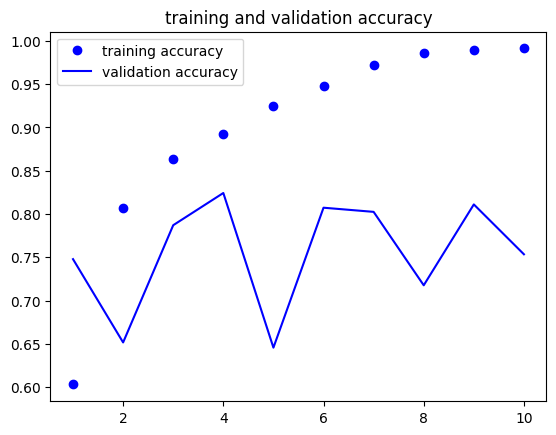

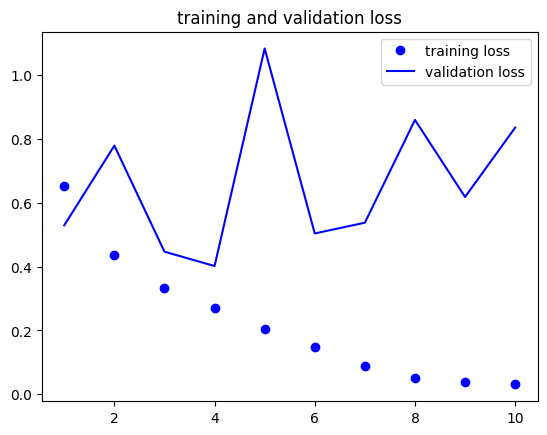

<Figure size 640x480 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(accuracy)+1)
plt.plot(epochs , accuracy , 'bo', label = 'training accuracy')
plt.plot(epochs,val_accuracy,'b' ,label = 'validation accuracy')
plt.title("training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs , loss , 'bo', label = 'training loss')
plt.plot(epochs,val_loss,'b' ,label = 'validation loss')
plt.title("training and validation loss")
plt.legend()
plt.figure()

